## Part One: Data Exploration

### 1.

In [297]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [298]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")


In [299]:
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [300]:
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [301]:
# Create dummy variables for female  and change smoker 
insurance['female']=(insurance['sex']=='female').astype(int)
insurance['yes_smoker']=(insurance['smoker']=='yes').astype(int)
insurance.head()

,age,sex,bmi,smoker,region,charges,female,yes_smoker
0,19,female,27.900,yes,southwest,16884.92400,1,1
1,33,male,22.705,no,northwest,21984.47061,0,0
2,32,male,28.880,no,northwest,3866.85520,0,0
3,31,female,25.740,no,southeast,3756.62160,1,0
4,60,female,25.840,no,northwest,28923.13692,1,0


### 2.

In [302]:
insurance.isna().any()

age           False
sex           False
bmi           False
smoker        False
region        False
charges       False
female        False
yes_smoker    False
dtype: bool

### 3. 

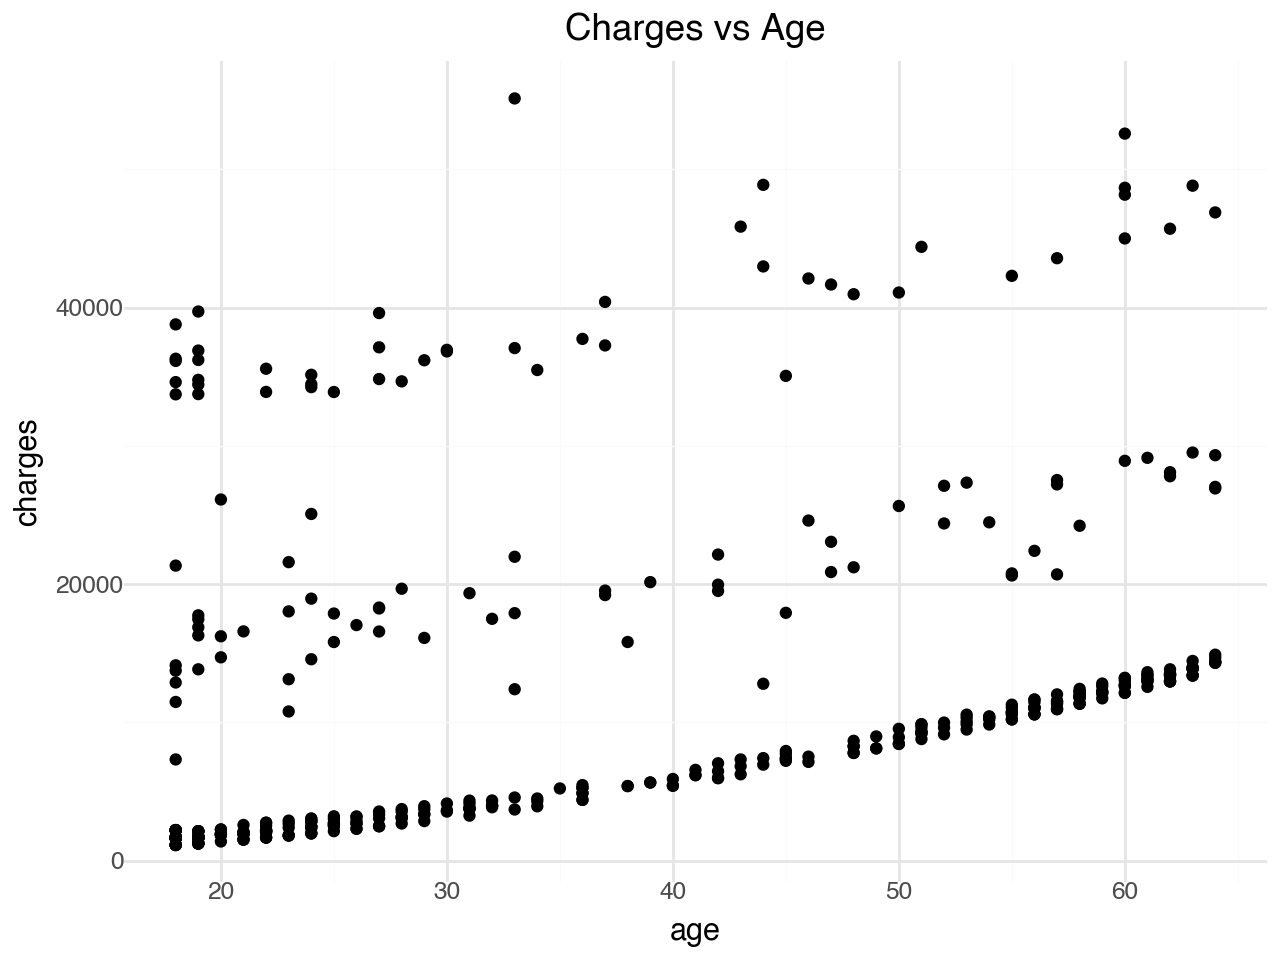

In [303]:
(ggplot(insurance, 
        aes(x='age', 
            y='charges')) +
    geom_point() + 
    theme_minimal() + 
    labs(title = 'Charges vs Age'))

There are three different groups that all have an upwards slope, meaning that as age increases insurance prices also increase. 

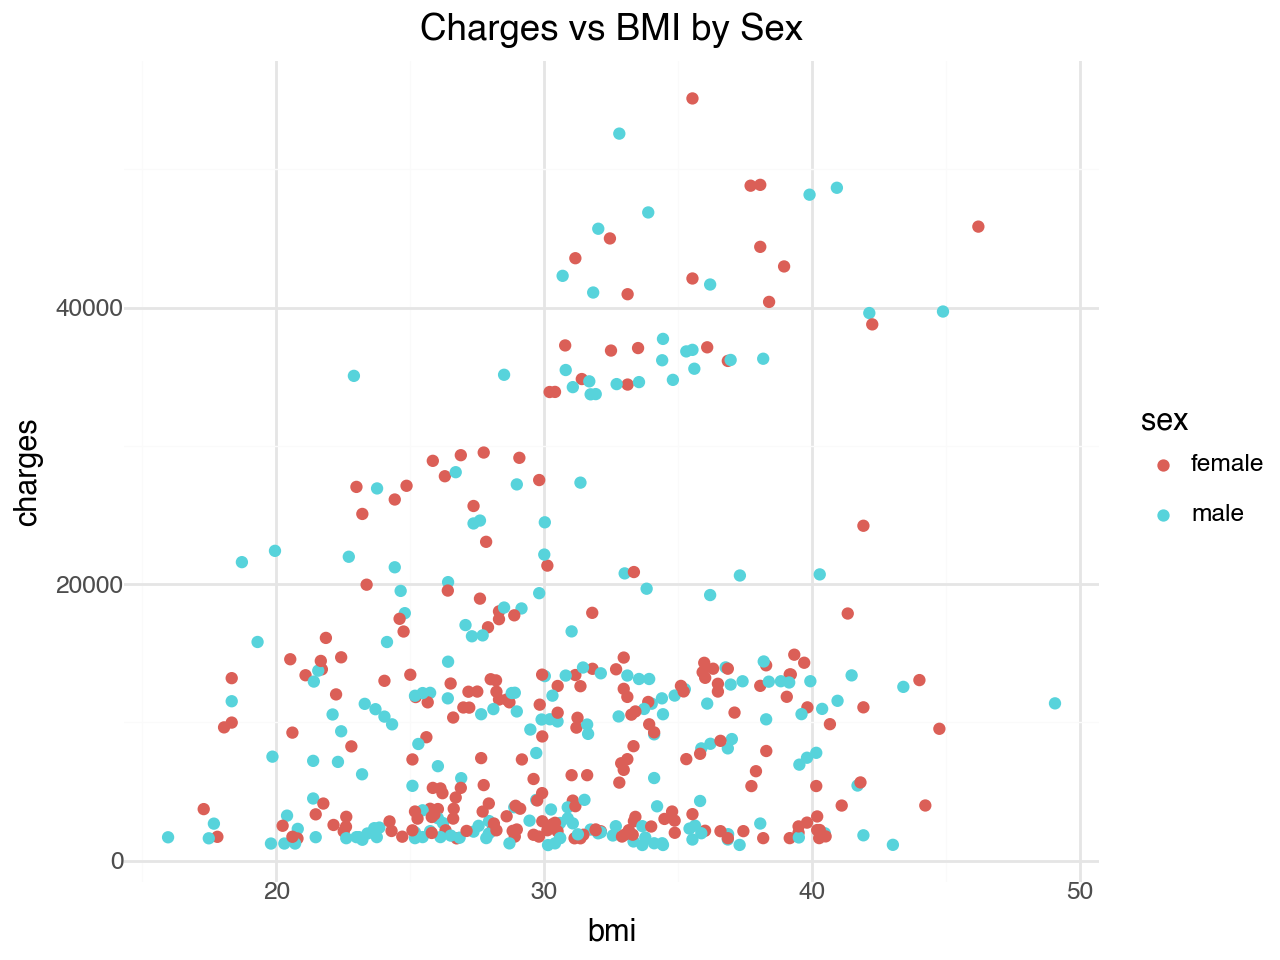

In [334]:
(ggplot(insurance, aes(x='bmi', y='charges', color='sex')) +
    geom_point() + 
    theme_minimal() + 
    labs(title = 'Charges vs BMI by Sex'))

Higher insurance charges tend to be associated with people with higher bmi. It seems that sex does not have a significant impact on insurance charges versus bmi.

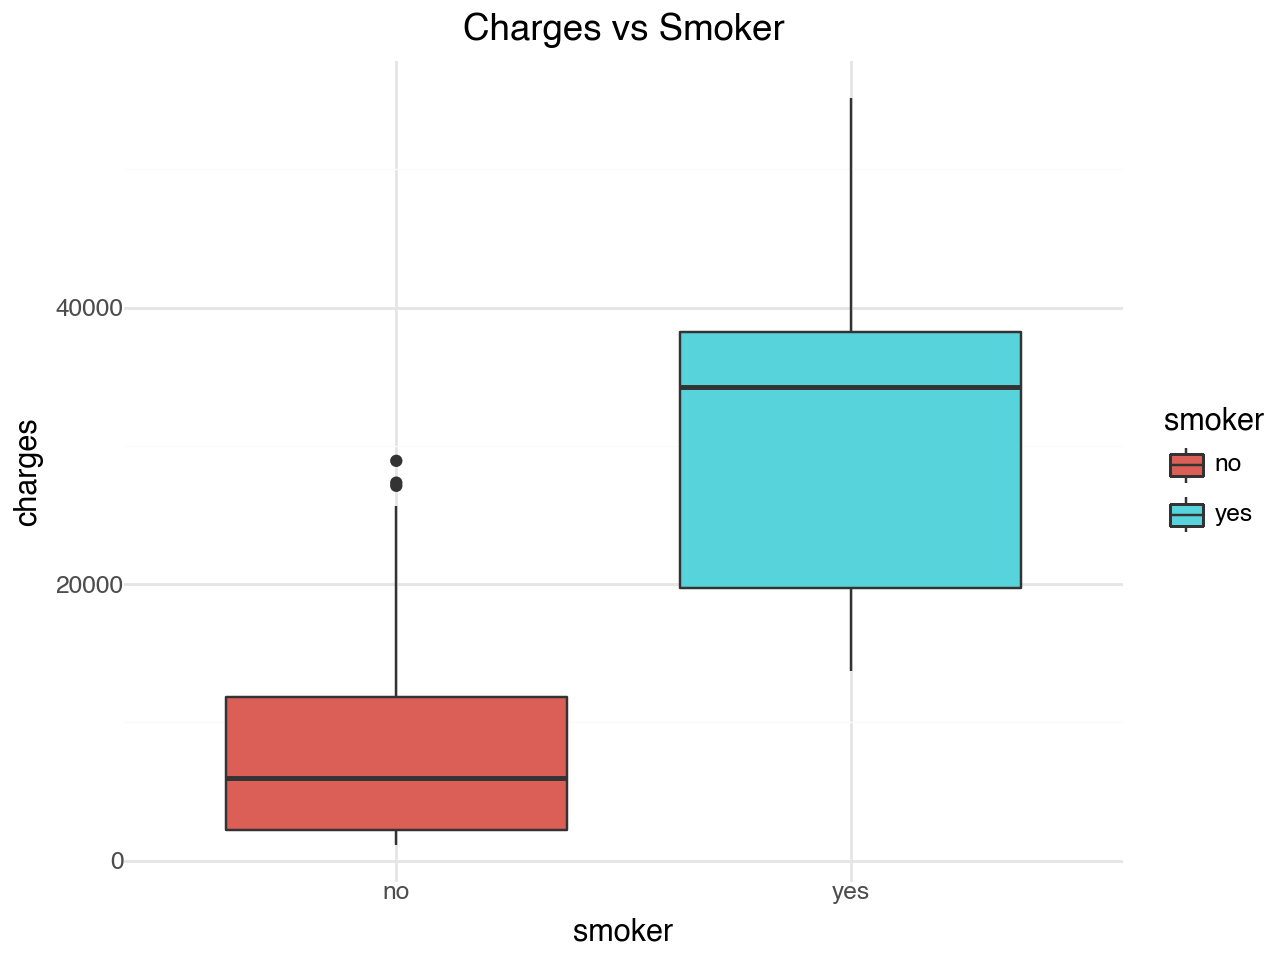

In [305]:
(ggplot(insurance, 
        aes(x='smoker', 
            y='charges',
            fill = "smoker")) +
    geom_boxplot() + 
    theme_minimal() + 
    labs(title = 'Charges vs Smoker'))

Insurance costs for smokers is much larger than the insurance cost of non-smokers

## Part Two: Simple Linear Models

### 1. Model 1: Age as Predictor Variable

In [306]:
X = insurance[["age"]]
y = insurance["charges"]

lr_pipeline = Pipeline(
  [("linear_regression", LinearRegression())]
)

rsquared = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))

R-squared: 0.08852044938114448
MSE: 127329756.22548977
R-squared: 0.08852044938114448
MSE: 127329756.22548977


In [307]:
X= insurance[["age"]]
y= insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

# Create a pipeline
pipeline1 = Pipeline ([
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

# Fit the data
pipeline1.fit(X_train, y_train)

fitted_model1 = pipeline1.fit(X_train, y_train)
ytrain_preds_1 = fitted_model1.predict(X_train)
ytest_preds_1 = fitted_model1.predict(X_test)

coef_1 = pipeline1['linear regression'].coef_
intercept_1 = pipeline1['linear regression'].intercept_

print("slope:",coef_1)
print("intercept:",intercept_1)

slope: [217.23810846]
intercept: 4312.766859634176
slope: [217.23810846]
intercept: 4312.766859634176


The MSE is a very large value which means that model's predictions may not be very accurate. The R-squared value of 0.088 is also very low, means that only about 9% of the variance in insurance charges is explained by age. The slope of 217 indicates that for each additional year of age, the insurance charges are expected to increase by approximately $217. The intercept of 4312 suggests that when the age is 0 the insurance charges of approximately $4,312.

### 2. Model 2: Age and Sex as Predictor Variables

In [308]:

X = insurance[["age","sex"]]
y= insurance["charges"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

lr_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


rsquared = cross_val_score(lr_pipeline2, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline2, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))


R-squared: 0.07256853039431414
MSE: 129754057.32539336
R-squared: 0.07256853039431414
MSE: 129754057.32539336


The MSE is still a very large value which means that model's predictions may not be very accurate. The R-squared value of 0.0725 is also very low, means that only about 7% of the variance in insurance charges is explained by age and sex variables together.

### 3. Model 3: Age and Smoker as Predictor Variables

In [309]:
X = insurance[["age","smoker"]]
y= insurance["charges"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

lr_pipeline3 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


rsquared = cross_val_score(lr_pipeline3, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline3, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))

R-squared: 0.7596814676284778
MSE: 33845870.13882872
R-squared: 0.7596814676284778
MSE: 33845870.13882872


The MSE is still a very large value which means that model's predictions may not be very accurate. The R-squared value of 0.7596 is much larger, means that about 76% of the variance in insurance charges is explained by this model with age and smoker variables as predictors.

### 4.

It is clear based on the significantly higher R-squared that Model 3 is much better than Model 2 model. Model 3 has a much larger R-square which somes that it is better at predicting the actual data. Also, the MSE for Model 3 is lower than than the MSE for Model 2, which confirms that Model 3 better fits the data.

## Part Three: Multiple Linear Models

### 1. Model 4: Age and BMI as Predictor Variables

In [310]:
X = insurance[["age","bmi"]]
y= insurance["charges"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)

lr_pipeline4 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


rsquared = cross_val_score(lr_pipeline4, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline4, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))

R-squared: 0.10907309251833675
R-squared: 0.10907309251833675


MSE: 124509031.88087204
MSE: 124509031.88087204


Compared to Model 1, Model 4 has a slightly higher R-squared and a slightly lower MSE, which means that Model 4 is superior.

### 2. Model 5: Age and Age^2 as Predictor Variables

In [332]:
X = insurance[["age"]]
y= insurance["charges"]

ct = ColumnTransformer(
  [("standardize", StandardScaler(), ["age"])], 
  remainder = "drop"
).set_output(transform = "pandas")

ct_poly = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 2, interaction_only = False), ["standardize__age"]), 
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

lr_pipeline5 = Pipeline(
  [("preprocessing", ct),
  ("preprocessing2", ct_poly),
  ("linear_regression", LinearRegression())]
)

rsquared = cross_val_score(lr_pipeline5, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline5, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))


R-squared: 0.08454798210842314
MSE: 127857226.13332221
R-squared: 0.08454798210842314
MSE: 127857226.13332221


In [ ]:
lr_pipeline5 = Pipeline(
  [("preprocessing", ct),
  ("preprocessing2", ct_poly),
  ("linear_regression", LinearRegression())]
)

rsquared = cross_val_score(lr_pipeline5, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline5, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))

Compared to Model 1, Model 5 has a slightly lower R-squared and a slightly higher MSE, which means that Model 1 is superior.

### 3. Model 6: Age, Age^2, Age^3 and Age^4 as Predictor Variables

In [312]:
X = insurance[["age"]]
y= insurance["charges"]

ct = ColumnTransformer(
  [("standardize", StandardScaler(), ["age"])], 
  remainder = "drop"
).set_output(transform = "pandas")

ct_poly = ColumnTransformer(
  [
    ("poly1", PolynomialFeatures(degree = 2, interaction_only = False), ["standardize__age"]), 
    ("poly2", PolynomialFeatures(degree = 3, interaction_only = False), ["standardize__age"]),
    ("poly3", PolynomialFeatures(degree = 4, interaction_only = False), ["standardize__age"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

lr_pipeline6 = Pipeline(
  [("preprocessing", ct),
  ("preprocessing2", ct_poly),
  ("linear_regression", LinearRegression())]
)


rsquared = cross_val_score(lr_pipeline6, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline6, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))


R-squared: 0.08023164231946271
MSE: 128430635.10370252
R-squared: 0.08023164231946271
MSE: 128430635.10370252


Compared to Model 1, Model 6 has a lower R-squared and a slightly higher MSE, which means that Model 1 is superior.

### 4. Model 7: Age, Age^2, Age^3... Age^12 as Predictor Variables

In [313]:
X = insurance[["age"]]
y= insurance["charges"]

ct = ColumnTransformer(
  [("standardize", StandardScaler(), ["age"])], 
  remainder = "drop"
).set_output(transform = "pandas")

ct_poly = ColumnTransformer(
  [
    ("poly1", PolynomialFeatures(degree = 2, interaction_only = False), ["standardize__age"]), 
    ("poly2", PolynomialFeatures(degree = 3, interaction_only = False), ["standardize__age"]),
    ("poly3", PolynomialFeatures(degree = 4, interaction_only = False), ["standardize__age"]),
    ("poly4", PolynomialFeatures(degree = 5, interaction_only = False), ["standardize__age"]),
    ("poly5", PolynomialFeatures(degree = 6, interaction_only = False), ["standardize__age"]),
    ("poly6", PolynomialFeatures(degree = 7, interaction_only = False), ["standardize__age"]),
    ("poly7", PolynomialFeatures(degree = 8, interaction_only = False), ["standardize__age"]),
    ("poly8", PolynomialFeatures(degree = 9, interaction_only = False), ["standardize__age"]),
    ("poly9", PolynomialFeatures(degree = 10, interaction_only = False), ["standardize__age"]),
    ("poly10", PolynomialFeatures(degree = 11, interaction_only = False), ["standardize__age"]),
    ("poly11", PolynomialFeatures(degree = 12, interaction_only = False), ["standardize__age"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

lr_pipeline7 = Pipeline(
  [("preprocessing", ct),
  ("preprocessing2", ct_poly),
  ("linear_regression", LinearRegression())]
)

rsquared = cross_val_score(lr_pipeline7, X, y, cv=5, scoring='r2')
print("R-squared:", rsquared.mean())

rsme = cross_val_score(lr_pipeline7, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", abs(rsme.mean()))

R-squared: 0.05699045703150827
MSE: 131561576.70682311
R-squared: 0.05699045703150827
MSE: 131561576.70682311


Compared to Model 1, Model 7 has a lower R-squared and a higher MSE, which means that Model 1 is superior.

### 5. 

According to the R-squared and MSE, Model 4 is superior with an R-squared of 0.1091 and a MSE of 124,509,031.88. I would agree that out of the these models it is the best option, because it conforms to the data without overfitting like we saw with model 7. 

### 6. 

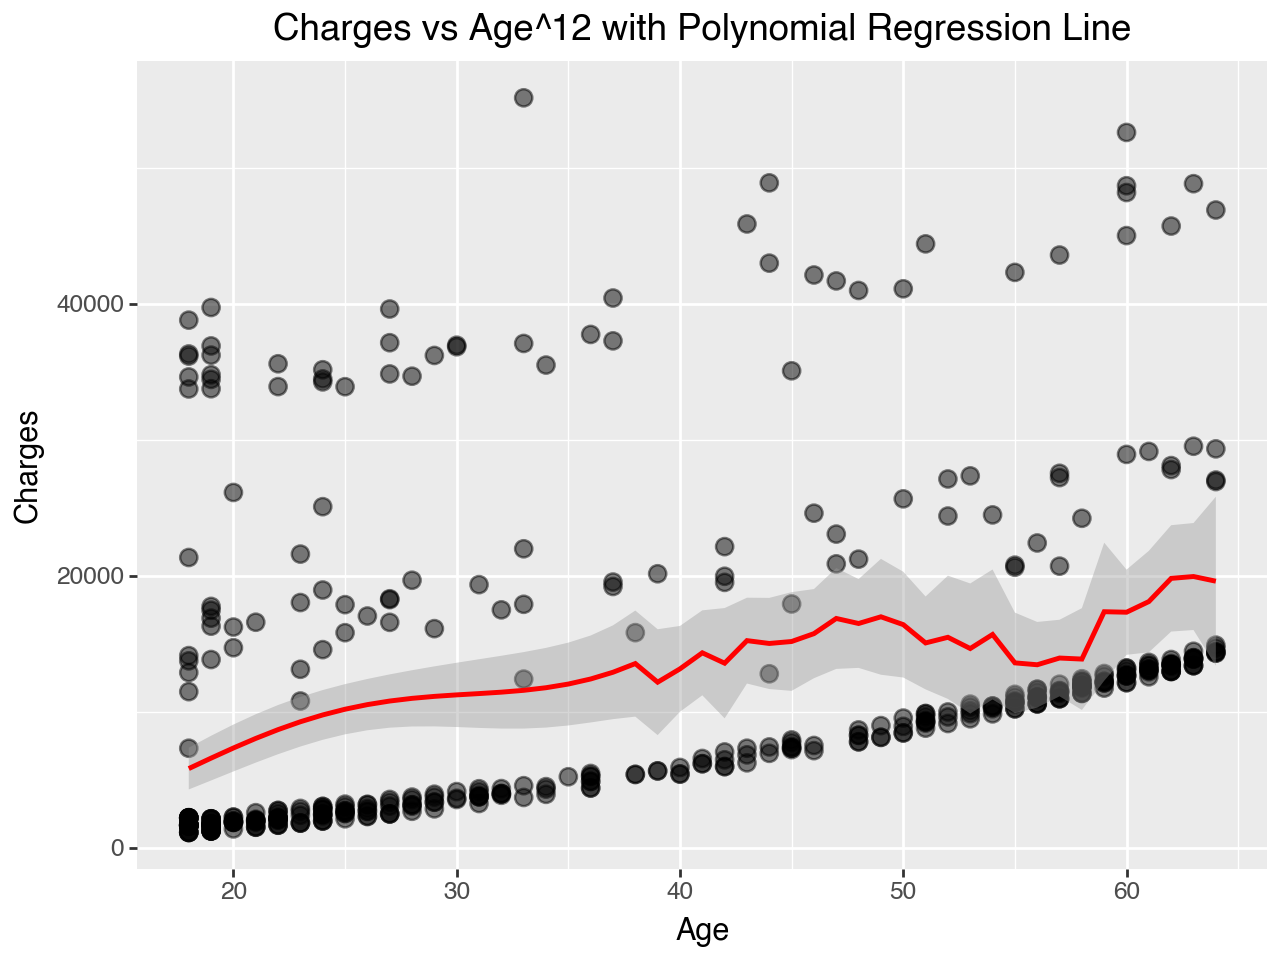

In [314]:
# Got this graph from ChatGPT

(ggplot(insurance, aes(x='age', y='charges'))
+ geom_point(size=3, alpha=0.5)
+ geom_smooth(method='lm', formula='y ~ x + I(x ** 2) + I(x ** 3)+ I(x ** 4) + I(x ** 5) + I(x ** 6)+ I(x ** 7) + I(x ** 8) + I(x ** 9) + I(x ** 10)+ I(x ** 11) + I(x ** 12)', color='red')
+ labs(title='Charges vs Age^12 with Polynomial Regression Line', x='Age', y='Charges')
)


## Part Four: New data

In [315]:
insurance2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")


In [316]:
# Create dummy variables
insurance2['female']=(insurance2['sex']=='female').astype(int)
insurance2['yes_smoker']=(insurance2['smoker']=='yes').astype(int)
insurance2.head()

,age,sex,bmi,smoker,region,charges,female,yes_smoker
0,23,male,34.400,no,southwest,1826.84300,0,0
1,56,male,40.300,no,southwest,10602.38500,0,0
2,18,male,34.100,no,southeast,1137.01100,0,0
3,63,female,23.085,no,northeast,14451.83515,1,0
4,63,male,28.310,no,northwest,13770.09790,0,0


### Model 8: Age as Predictor Variable

In [317]:
X_train = insurance[["age"]]
y_train = insurance["charges"]
X_test = insurance2[["age"]]
y_test = insurance2["charges"]


lr_pipeline8 = Pipeline ([
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")


fitted_model = lr_pipeline8.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse_1)
print("R-squared:",r2)

MSE: 136077136.50195494
R-squared: 0.12236515675533055
MSE: 136077136.50195494
R-squared: 0.12236515675533055


### Model 9: Age and BMI as Predictor Variables

In [318]:
X_train = insurance[['age', 'bmi']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi']]
y_test = insurance2["charges"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
  ],
  remainder = "drop"
)

lr_pipeline9 = Pipeline ([
    ("preprocessing", ct),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")


fitted_model = lr_pipeline9.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse_1)
print("R-squared:",r2)

MSE: 136077136.50195494
R-squared: 0.14455628272331222
MSE: 136077136.50195494
R-squared: 0.14455628272331222


### Model 10: Age, BMI, and Smoker as Predictor Variables

In [319]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2["charges"]
 
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age", "bmi"]),
  ],
  remainder = "drop"
)

lr_pipeline10 = Pipeline ([
     ("preprocessing", ct),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")


fitted_model = lr_pipeline10.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse_1)
print("R-squared:",r2)

MSE: 136077136.50195494
R-squared: 0.7711658569172218
MSE: 136077136.50195494
R-squared: 0.7711658569172218


### Model 11: Age and BMI, with Both Having an Interaction Term with Smoker

In [320]:
# Create the dummy variables outside pipeline so that smoker isn't included in the model
# I couldn't figure 
insurance["Age_Smoker"] = insurance["age"] * insurance["yes_smoker"]
insurance["BMI_Smoker"] = insurance["bmi"] * insurance["yes_smoker"]

insurance2["Age_Smoker"] = insurance2["age"] * insurance2["yes_smoker"]
insurance2["BMI_Smoker"] = insurance2["bmi"] * insurance2["yes_smoker"]


In [321]:
X_train = insurance[["age", "bmi", "Age_Smoker", "BMI_Smoker"]]
y_train = insurance['charges']
X_test = insurance2[["age", "bmi", "Age_Smoker", "BMI_Smoker"]]
y_test = insurance2['charges']

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker", "BMI_Smoker"]),
  ],
  remainder = "drop"
)

# Build the pipeline
lr_pipeline11 = Pipeline([
    ('preprocessing', ct),
    ('linear_regression', LinearRegression())
])


fitted_model = lr_pipeline11.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 24795908.412643358
R-squared: 0.8400778135676981
Mean Squared Error: 24795908.412643358
R-squared: 0.8400778135676981


### Model 12: Age, BMI, and Smoker with Age and BMI Having Interaction Terms with Smoker

In [322]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2["charges"]
 
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop='first'), ["smoker"]),
    ("standardize", StandardScaler(), ["age", "bmi"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction1", PolynomialFeatures(interaction_only = True), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True), ["standardize__bmi", "dummify__smoker_yes"])
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

lr_pipeline12 = Pipeline(
  [("preprocessing", ct),
  ("interaction", ct_inter),
  ("linear_regression", LinearRegression())]
)

fitted_model = lr_pipeline12.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse_1)
print("R-squared:",r2)

MSE: 136077136.50195494
R-squared: 0.8594886795699617
MSE: 136077136.50195494
R-squared: 0.8594886795699617


Model 12 is the best model out of the new one because it has the highest R-squared of 0.8595, which is very large. This means that about 86% of the variance in insurance charges is explained by this model.

In [323]:
insurance2['residuals'] = y_test - ytest_preds

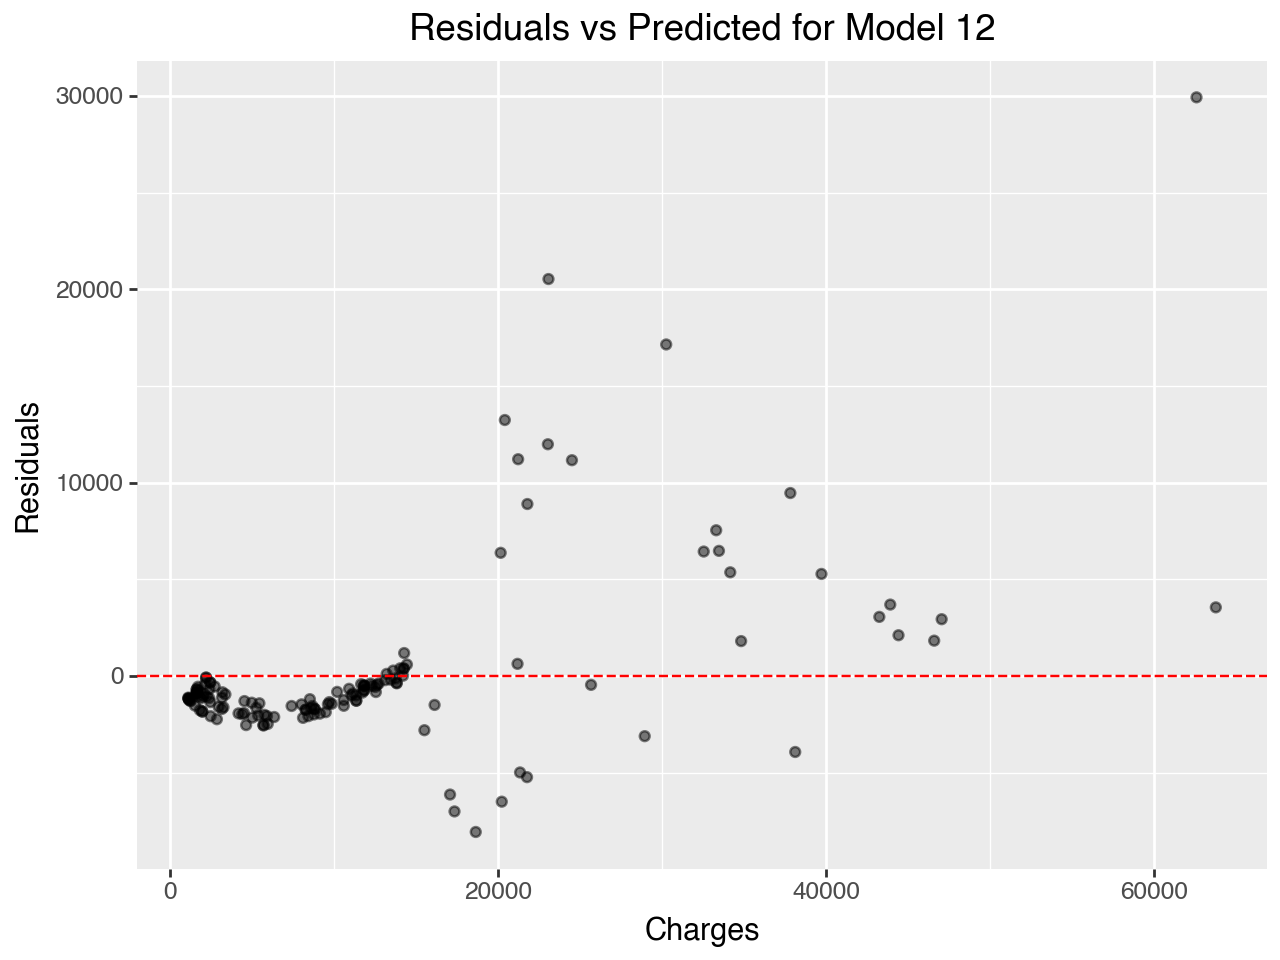

In [324]:
(ggplot(insurance2, aes(x = "charges", y = "residuals")) + 
    geom_point(alpha=0.5) + 
    geom_hline(yintercept=0, linetype='dashed', color='red') + 
    labs(x = "Charges", y = "Residuals", title = "Residuals vs Predicted for Model 12")
)

## Part Five: Full Exploration

### Model 13: Age, Age^2, BMI, BMI^2 As Predictors

In [325]:
X_train = insurance[['age', 'bmi']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi']]
y_test = insurance2["charges"]

ct = ColumnTransformer(
    [("poly", PolynomialFeatures(degree=2, include_bias=False), ["age", "bmi"])],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipeline13 = Pipeline(
  [("preprocessing", ct), 
  ("linear_regression", LinearRegression())]
)

fitted_model = lr_pipeline13.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse_1)
print("R-squared:",r2)

MSE: 136077136.50195494
R-squared: 0.12672350203498917
MSE: 136077136.50195494
R-squared: 0.12672350203498917


### Model 14: Age, BMI, Smoker, and Interaction between Age and BMI

In [326]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2["charges"]


ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, drop="first"), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ]
).set_output(transform = "pandas")


poly_inter = ColumnTransformer(
    [("interaction", PolynomialFeatures(degree=2, interaction_only=True), ["standardize__age", "standardize__bmi"])],
    remainder="passthrough"
).set_output(transform = "pandas")

lr_pipeline14 = Pipeline(
    [("preprocessing", ct), 
    ("interaction", poly_inter), 
    ("linear_regression", LinearRegression())]
)

fitted_model = lr_pipeline14.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse)
print("R-squared:",r2)


MSE: 35514622.828587204
R-squared: 0.770947043417445
MSE: 35514622.828587204
R-squared: 0.770947043417445


### Model 15: Age, Age^2, BMI, BMI^2, Smoker, and Interaction between Age and BMI

In [327]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2["charges"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, drop="first"), ["smoker"]),
        ("poly", PolynomialFeatures(degree=2, include_bias=False), ["age", "bmi"])
    ],
    remainder="passthrough"
).set_output(transform = "pandas")

lr_pipeline15 = Pipeline(
    [("preprocessing", ct), 
    ("linear_regression", LinearRegression())]
).set_output(transform = "pandas")


fitted_model = lr_pipeline15.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)


print("MSE:",mse)
print("R-squared:",r2)


MSE: 35502778.92571986
R-squared: 0.7710234311347619
MSE: 35502778.92571986
R-squared: 0.7710234311347619


### Model 16: Age, BMI, Smoker, Age * BMI, Age * Smoker, BMI * Smoker, and Age * BMI * Smoker 

In [328]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2["charges"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, drop="first"), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ]
).set_output(transform="pandas")

poly_inter = ColumnTransformer(
    [("poly", PolynomialFeatures(degree=3, interaction_only=True), ["standardize__age", "standardize__bmi", "dummify__smoker_yes"])],
    remainder="passthrough"
).set_output(transform="pandas")

lr_pipeline16 = Pipeline(
    [
        ("preprocessing", ct),
        ("interaction", poly_inter),
        ("linear_regression", LinearRegression())
    ]
)

fitted_model = lr_pipeline16.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)

print("MSE:", mse)
print("R-squared:", r2)


MSE: 21649538.59707779
R-squared: 0.8603704494274627
MSE: 21649538.59707779
R-squared: 0.8603704494274627


### Model 17: Age, Age^2, BMI, BMI^2, Smoker, Age * Smoker, BMI * Smoker, and Age * BMI * Smoker

In [329]:
X_train = insurance[['age', 'bmi', 'smoker']]
y_train = insurance["charges"]
X_test = insurance2[['age', 'bmi', 'smoker']]
y_test = insurance2["charges"]
 
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, drop='first'), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform="pandas")

ct_poly = ColumnTransformer(
    [
        ("poly1", PolynomialFeatures(degree=2, interaction_only=False), ["standardize__age"]),
        ("poly2", PolynomialFeatures(degree=2, interaction_only=False), ["standardize__bmi"]),
    ],
    remainder="passthrough"
).set_output(transform="pandas")

ct_inter = ColumnTransformer(
    [
        ("interaction1", PolynomialFeatures(interaction_only=True), ["poly1__standardize__age", "remainder__dummify__smoker_yes"]),
        ("interaction2", PolynomialFeatures(interaction_only=True), ["poly2__standardize__bmi", "remainder__dummify__smoker_yes"]),
        ("interaction3", PolynomialFeatures(interaction_only=True), ["poly2__standardize__bmi", "poly1__standardize__age", "remainder__dummify__smoker_yes"]),
    ],
    remainder="passthrough"
).set_output(transform="pandas")

lr_pipeline17 = Pipeline(
    [
        ("preprocessing", ct),
        ("preprocessing2", ct_poly),
        ("interaction", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

fitted_model = lr_pipeline17.fit(X_train, y_train)
ytest_preds = fitted_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_preds)
r2 = r2_score(y_test, ytest_preds)

print("MSE:", mse)
print("R-squared:", r2)


MSE: 21387621.516864102
R-squared: 0.8620596939364631
MSE: 21387621.516864102
R-squared: 0.8620596939364631


Model 17 is the best model that I could come up with. It has the lowest MSE out of the models and has the highest R-squared of 0.862.

In [330]:
insurance2['residuals'] = y_test - ytest_preds

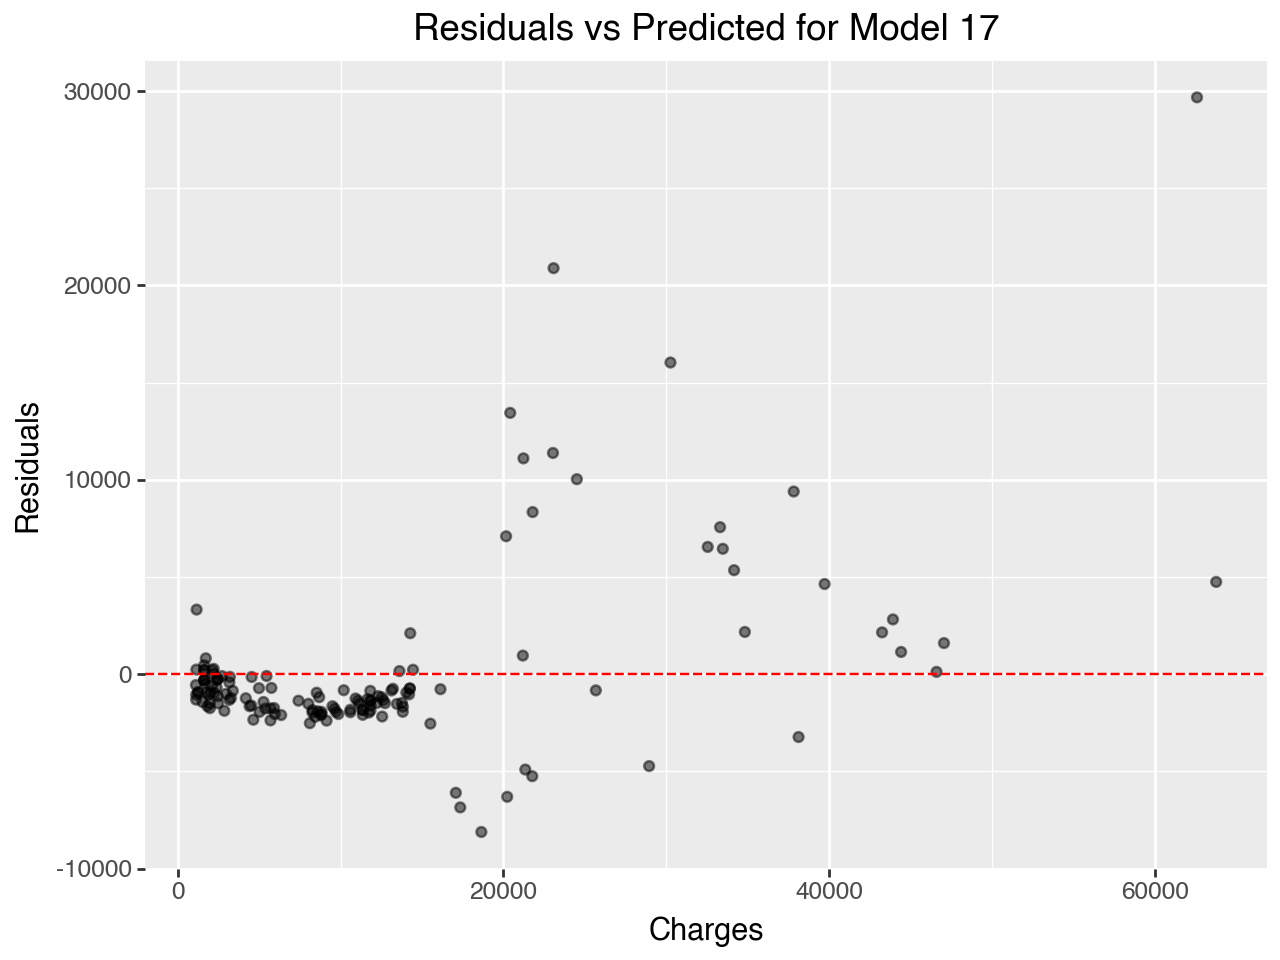

In [331]:
(ggplot(insurance2, aes(x = "charges", y = "residuals")) + 
    geom_point(alpha=0.5) + 
    geom_hline(yintercept=0, linetype='dashed', color='red') + 
    labs(x = "Charges", y = "Residuals", title = "Residuals vs Predicted for Model 17")
)